In [2]:
import numpy as np

# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile, Aer, IBMQ
from qiskit.tools.jupyter import *
from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.providers.aer import QasmSimulator

# Loading your IBM Quantum account(s)
provider = IBMQ.load_account()

ibmqfactory.load_account:WARNING:2022-10-06 22:01:18,561: Credentials are already in use. The existing account in the session will be replaced.


In [6]:
# I have attempted the task-2 using Grover's unstructured search algorithm
import matplotlib.pyplot as plt
import numpy as np

# importing Qiskit
from qiskit import IBMQ, Aer, assemble, transpile
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister
import random
# import basic plot tools
from qiskit.visualization import plot_histogram


def missing_number(input_vector):
    N = len(input_vector)+1
    n = int(np.log2(N))
    qr = QuantumRegister(n)
    ancilla = QuantumRegister(1)
    cr = ClassicalRegister(n)
    qc = QuantumCircuit(qr,ancilla,cr)
    
    # Creating equal superposition and |-> for ancilla qubit
    qc.h(qr[:])
    qc.x(ancilla[0])
    qc.h(ancilla[0])
    qc.barrier()
    
    # define oracle function. We create a oracle function which xors 1 with ancilla if the state is present
    # in the input vector and xors 0 otherwise. As per our arrangement of ancilla being |->, this would add
    # a local phase of -1 in the superposition state on all the states present in the input_vector. 
    #Upto a global phase, this would mean a local phase of -1 on state not present in the input_vector.
    def oracle(qc,qr,ancilla,input_vector):
        for i in input_vector:
            binary_list = [int(d) for d in f"{i:0{n}b}".format(n)]
            for l,j in enumerate(reversed(binary_list)):
                if j==0:
                    qc.x(qr[l])
            qc.mct(qr[:],ancilla[0])
            for l,j in enumerate(reversed(binary_list)):
                if j==0:
                    qc.x(qr[l])
                   
        
    # define the diffusor circuit.
    def diffusor(qc,qr,n):
        # Performing the operation (2|s><s|-I) = H(2|0><0|-I)H , which is nothing but a - phase |0><0| and 
        # a + phase on all other states upto a global phase. Squeezing between X, XH(2|0><0|-I)HX, this is
        # adding a - phase on |111..1><11..11|. This is obtained by MCZ gate. 
        
        qc.h(qr[:])
        qc.x(qr[:])
        
        # Applying MCZ gate
        qc.h(qr[n-1])
        qc.mct(qr[0:n-1],qr[n-1])
        qc.h(qr[n-1])
        
        qc.x(qr[:])
        qc.h(qr[:])
        
    # For large enough N, we should be amplify the amplitude enough by sqrt(N) iterations.    
    for i in range(int(np.sqrt(N))):
        oracle(qc,qr,ancilla,input_vector)
        qc.barrier()
        diffusor(qc,qr,n)
        qc.barrier()
        
    # measurement
    qc.measure(qr,cr)
    aer_sim = Aer.get_backend('aer_simulator')
    qobj = assemble(qc)
    result = aer_sim.run(qobj).result()
    counts = result.get_counts()  
    print("The calculated missing value is :")
    print(int(max(counts, key=counts.get),2)) 
    return counts
    
    

In [7]:
input_vector=[2,0,1,4,7,6,5]  # Here the missing value is 3 
counts = missing_number(input_vector)
print(counts)

The calculated missing value is :
3
{'001': 9, '101': 10, '111': 9, '011': 962, '000': 14, '010': 8, '110': 2, '100': 10}


In [9]:
input_vector=[3,0,1]  # Here the missing value is 2 
counts = missing_number(input_vector)
print(counts)

The calculated missing value is :
3
{'01': 228, '11': 267, '10': 262, '00': 267}


# We see that for n=2, i.e. vector_length = 3, the solution does not converge. This is because we use the asymptotic relation that O(sqrt(N)) iterations suffice to give us the solution i.e. amplify the solution's amplitude enough. But for smallmvalues of N such that N = 4, we see that it fails to converge. When we run it for iterations=4, we get the solution with absolute certainty.

In [13]:
def missing_number_special(input_vector):
    N = len(input_vector)+1
    n = int(np.log2(N))
    qr = QuantumRegister(n)
    ancilla = QuantumRegister(1)
    cr = ClassicalRegister(n)
    qc = QuantumCircuit(qr,ancilla,cr)
    
    # Creating equal superposition and |-> for ancilla qubit
    qc.h(qr[:])
    qc.x(ancilla[0])
    qc.h(ancilla[0])
    qc.barrier()
    
    # define oracle function. We create a oracle function which xors 1 with ancilla if the state is present
    # in the input vector and xors 0 otherwise. As per our arrangement of ancilla being |->, this would add
    # a local phase of -1 in the superposition state on all the states present in the input_vector. 
    #Upto a global phase, this would mean a local phase of -1 on state not present in the input_vector.
    def oracle(qc,qr,ancilla,input_vector):
        for i in input_vector:
            binary_list = [int(d) for d in f"{i:0{n}b}".format(n)]
            for l,j in enumerate(reversed(binary_list)):
                if j==0:
                    qc.x(qr[l])
            qc.mct(qr[:],ancilla[0])
            for l,j in enumerate(reversed(binary_list)):
                if j==0:
                    qc.x(qr[l])
                   
        
    # define the diffusor circuit.
    def diffusor(qc,qr,n):
        # Performing the operation (2|s><s|-I) = H(2|0><0|-I)H , which is nothing but a - phase |0><0| and 
        # a + phase on all other states upto a global phase. Squeezing between X, XH(2|0><0|-I)HX, this is
        # adding a - phase on |111..1><11..11|. This is obtained by MCZ gate. 
        
        qc.h(qr[:])
        qc.x(qr[:])
        
        # Applying MCZ gate
        qc.h(qr[n-1])
        qc.mct(qr[0:n-1],qr[n-1])
        qc.h(qr[n-1])
        
        qc.x(qr[:])
        qc.h(qr[:])
        
    # For large enough N, we should be amplify the amplitude enough by sqrt(N) iterations.    
    for i in range(4):
        oracle(qc,qr,ancilla,input_vector)
        qc.barrier()
        diffusor(qc,qr,n)
        qc.barrier()
        
    # measurement
    qc.measure(qr,cr)
    aer_sim = Aer.get_backend('aer_simulator')
    qobj = assemble(qc)
    result = aer_sim.run(qobj).result()
    counts = result.get_counts()  
    print("The calculated missing value is :")
    print(int(max(counts, key=counts.get),2)) 
    return counts

input_vector=[3,0,1]  # Here the missing value is 2 
counts = missing_number_special(input_vector)
print(counts)

The calculated missing value is :
2
{'10': 1024}


# Here we see that we get the solution with absolute certainty but at the expense of quantum advantage as the number of iterations become equal to length of vector.Below we try to plot the time taken to compute the solution for different values of vector lengths. We see that except the n=2 case, we get the correct solution in O(sqrt(N)) complexity. The plot gives time complexity.

Real missing value for vector length 4 :
2
The calculated missing value is :
3
Real missing value for vector length 8 :
7
The calculated missing value is :
7
Real missing value for vector length 16 :
9
The calculated missing value is :
9
Real missing value for vector length 32 :
3
The calculated missing value is :
3
Real missing value for vector length 64 :
10
The calculated missing value is :
10
Real missing value for vector length 128 :
32
The calculated missing value is :
32
Real missing value for vector length 256 :
236
The calculated missing value is :
236
Real missing value for vector length 512 :
301
The calculated missing value is :
301
Real missing value for vector length 1024 :
356
The calculated missing value is :
356
Real missing value for vector length 2048 :
1414
The calculated missing value is :
1414


Text(0, 0.5, 'Time taken in secs')

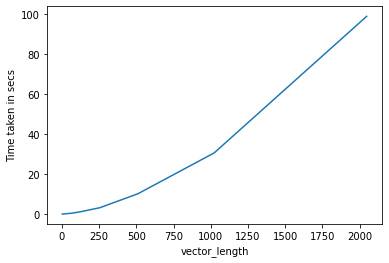

In [12]:
import time
Time = []
vector_lengths = []
for n in range(2,12):
    N = 2**n
    input_vector = list(np.arange(N))
    print(f"Real missing value for vector length {N} :".format(N))
    print(input_vector.pop(random.randint(0,N)))  
    random.shuffle(input_vector)
    start = time.time()
    counts = missing_number(input_vector) 
    end = time.time()
    Time.append(end-start)
    vector_lengths.append(N-1)
    input_vector = []
plt.plot(vector_lengths,Time)
plt.xlabel('vector_length')
plt.ylabel('Time taken in secs')